# KNN investigation with scikit learn

Dataset is avaialble at:
 - http://archive.ics.uci.edu/ml/datasets/Ionosphere
dataset desciption:
 - https://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.names

In [125]:
import numpy as np
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from matplotlib import pyplot as plt
%matplotlib inline

In [66]:
data_filename = "data/ionosphere.txt"
X = np.zeros((351,34),dtype = 'float')
y = np.zeros((351,),dtype = 'bool')

In [67]:
with open(data_filename,'r') as input_file:
    reader = csv.reader(input_file)
    for i, row in enumerate(reader):
        #get the feature values and encode
        data = [float(value) for value in row[:-1]]
        X[i] = data
        #encode the target
        y[i] = row[-1] == 'g'

In [69]:
seed = 7
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state = seed)

In [75]:
#KNN with deafult size of 5
estimator = KNeighborsClassifier()
estimator.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [77]:
#train the estimator and evaluate
y_pred = estimator.predict(X_test)
accuaracy = np.mean(y_test==y_pred)*100
print("The accuracy is {0:.1f}".format(accuaracy))

The accuracy is 88.6


In [84]:
#Check for class imbalances
print(np.sum([y==1]))
print(np.sum([y==0]))

225
126


In [99]:
#Try cross val score
scores = cross_val_score(estimator,X,y,scoring='accuracy',cv=5)
average_accuracy = np.mean(scores)*100
print("The average accuracy is {0:.1f}".format(average_accuracy))

The average accuracy is 84.0


In [102]:
#try different number of neighbours, with number of folds =5
avg_scores = []
all_scores = []
param_values = list(range(1,21))
for n_neighbors in param_values:
    estimator = KNeighborsClassifier(n_neighbors=n_neighbors)
    scores = cross_val_score(estimator,X,y, scoring='accuracy',cv=5)
    print(scores)
    avg_scores.append(np.mean(scores))
    all_scores.append(scores)    

[ 0.84507042  0.78571429  0.82857143  0.91428571  0.84285714]
[ 0.84507042  0.81428571  0.84285714  0.94285714  0.91428571]
[ 0.84507042  0.74285714  0.78571429  0.92857143  0.85714286]
[ 0.84507042  0.77142857  0.8         0.92857143  0.87142857]
[ 0.83098592  0.77142857  0.8         0.88571429  0.84285714]
[ 0.84507042  0.77142857  0.81428571  0.9         0.85714286]
[ 0.83098592  0.77142857  0.81428571  0.87142857  0.81428571]
[ 0.84507042  0.77142857  0.81428571  0.88571429  0.82857143]
[ 0.84507042  0.77142857  0.8         0.87142857  0.82857143]
[ 0.85915493  0.78571429  0.81428571  0.87142857  0.85714286]
[ 0.85915493  0.77142857  0.8         0.87142857  0.84285714]
[ 0.85915493  0.77142857  0.81428571  0.88571429  0.88571429]
[ 0.83098592  0.77142857  0.81428571  0.85714286  0.87142857]
[ 0.85915493  0.77142857  0.81428571  0.87142857  0.88571429]
[ 0.84507042  0.75714286  0.82857143  0.85714286  0.87142857]
[ 0.85915493  0.77142857  0.82857143  0.87142857  0.88571429]
[ 0.8450

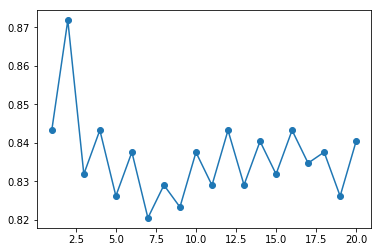

In [107]:
#plot parameter value against scores
plt.plot(param_values,avg_scores,"-o")

### Preprocessing the dataset

In [110]:
#try making features scale very uneven; divide every second feature by 10
X_broke = np.array(X)
X_broke[:,::2] /= 10

In [113]:
#uneven feature distances lead to worse performance in KNN
estimator = KNeighborsClassifier()
original_scores = cross_val_score(estimator, X, y,scoring='accuracy',cv=5)
print("The original average accuracy for is {0:.1f}%".format(np.mean(original_scores) * 100))
broken_scores = cross_val_score(estimator, X_broke, y,scoring='accuracy',cv=5)
print("The 'broken' average accuracy for is {0:.1f}%".format(np.mean(broken_scores) * 100))

The original average accuracy for is 82.6%
The 'broken' average accuracy for is 73.8%


In [122]:
#Apply scaling to the broken dataset
#use min amx scaler; scale values between 0 and 1
X_trans = MinMaxScaler().fit_transform(X_broke)
estimator = KNeighborsClassifier()
transformed_scores = cross_val_score(estimator, X_trans,y,scoring='accuracy',cv=5)
print('The accuracy for corrected scaling is {0:.1f}%'.format(np.mean(transformed_scores)*100))

The accuracy for corrected scaling is 82.9%


### Applying a pipeline

In [131]:
scaling_pipeline = Pipeline([('scale', MinMaxScaler()),('predict', KNeighborsClassifier())])
scores = cross_val_score(scaling_pipeline, X_broke, y, scoring='accuracy')
print("The pipeline scored an average accuracy for is {0:.1f}%".format(np.mean(transformed_scores) * 100))

The pipeline scored an average accuracy for is 82.9%
